In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom_test, ttest_1samp

In [22]:
FLAT_FILE_DIR = "../flat_files/"

full_table = pd.read_csv(FLAT_FILE_DIR + "full_table.csv")
event_table = pd.read_csv(FLAT_FILE_DIR + "event_table.csv")
deck_list_table = pd.read_csv(FLAT_FILE_DIR + "deck_list_table.csv")
pilot_table = pd.read_csv(FLAT_FILE_DIR + "pilot_table.csv")
deck_table = pd.read_csv(FLAT_FILE_DIR + "deck_table.csv")
card_table = pd.read_csv(FLAT_FILE_DIR + "card_table.csv")

In [106]:
# Common Slices

first_place_decks = deck_table[deck_table["rank"] == 1].copy()

In [63]:
deck_table.head()

,deckId,eventId,pilotId,deckUrl,name,rank,archetype,category
0,1,1,3,?e=27938&d=421597&f=ST,Gruul Aggro,1,aggro,gruul
1,2,1,4,?e=27938&d=421598&f=ST,UW Control,2,control,azorius
2,3,2,5,?e=27939&d=421599&f=ST,Red Deck Wins,1,aggro,mono red
3,4,3,6,?e=27940&d=421600&f=ST,Rakdos Aggro,1,aggro,rakdos
4,5,4,7,?e=27925&d=421512&f=ST,Gruul Aggro,1,aggro,gruul


In [70]:
event_table.head()

,eventId,name,link,date,latest_set
0,1,FNM @ MTG Arena Campania,https://www.mtgtop8.com/event?e=27938&f=ST,2020-10-30,Zendikar Rising
1,2,Torneios @ Ludo Quest,https://www.mtgtop8.com/event?e=27939&f=ST,2020-10-30,Zendikar Rising
2,3,All Hallow's Eve FNM @ Gamer's Gauntlet,https://www.mtgtop8.com/event?e=27940&f=ST,2020-10-30,Zendikar Rising
3,4,Japan Championship 2020 Autumn Last Chance Tri...,https://www.mtgtop8.com/event?e=27925&f=ST,2020-10-29,Zendikar Rising
4,5,Free Daily @ Owl Central Games,https://www.mtgtop8.com/event?e=27918&f=ST,2020-10-28,Zendikar Rising


In [107]:
def most_winning_archetypes():
    first_place_decks.loc[first_place_decks["archetype"] == "rogue", "archetype"] = "mill"
    grouped_archetypes = first_place_decks.groupby("archetype")["rank"].sum().reset_index().sort_values(by="rank", ascending=False)
    plt.figure(figsize=(12, 8))
#     sns.barplot(data=grouped_archetypes, x="archetype", y="rank")
    plt.bar(range(len(grouped_archetypes)), grouped_archetypes["rank"])
    plt.xticks(range(len(grouped_archetypes)), grouped_archetypes["archetype"], rotation=30)
    plt.title("Most Winning Archetypes")
    plt.show()

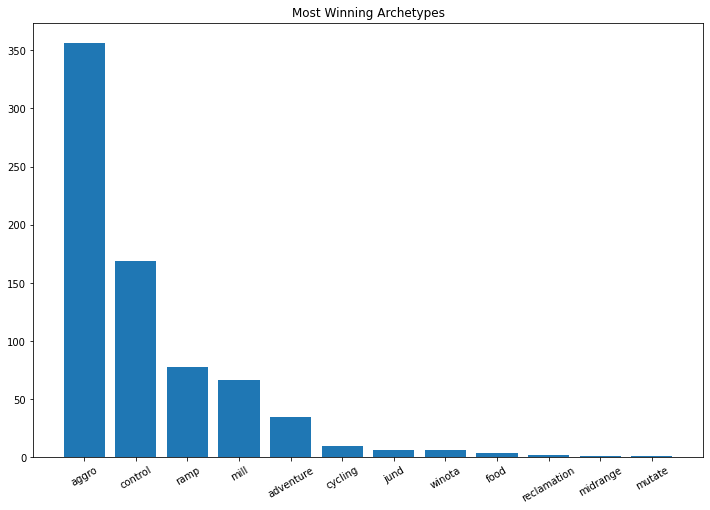

In [108]:
most_winning_archetypes()

In [109]:
def most_winning_colors():
    grouped_category = first_place_decks.groupby("category")["rank"].count().reset_index().sort_values(by="rank", ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(data=grouped_category, x="category", y="rank")
    plt.title("Most Winning Colors")
    plt.xticks(rotation=30)
    plt.show()

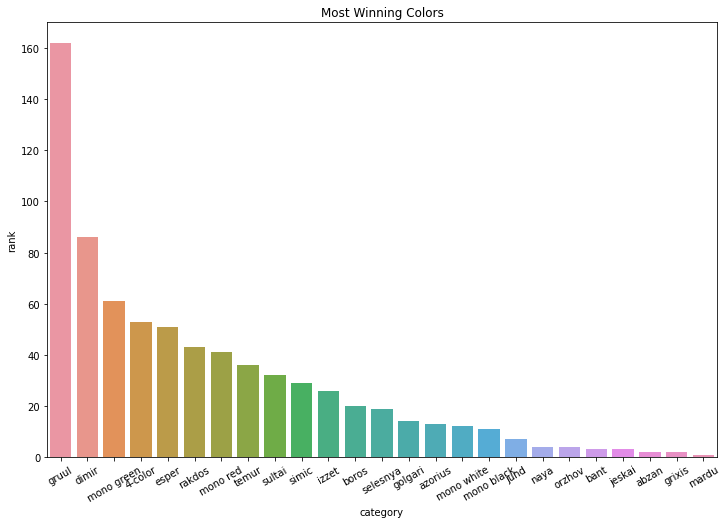

In [110]:
most_winning_colors()

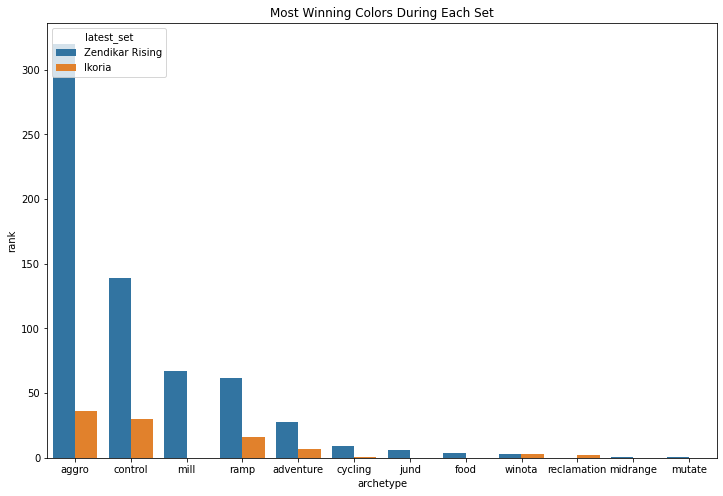

In [113]:
def most_winning_colors_by_set():
    merged_table = first_place_decks.merge(event_table[["eventId", "latest_set"]], on="eventId", suffixes=[None, "_event"])
    grouped_table = merged_table.groupby(["archetype", "latest_set"])["rank"].count().reset_index().sort_values(by="rank", ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(data=grouped_table, x="archetype", y="rank", hue="latest_set")
    plt.title("Most Winning Colors During Each Set")
    plt.show()

most_winning_colors_by_set()

In [114]:
def what_colors_go_with_archetype():
    archetypes = deck_table["archetype"]
    colors = deck_table["category"]
    frequencies = pd.crosstab(archetypes, colors)
    return frequencies

# what_colors_go_with_archetype()

In [117]:
def colors_and_archetypes(archetype):
    first_place_archetype = first_place_decks[first_place_decks["archetype"] == archetype].copy()
    grouped_table = first_place_archetype.groupby("category")["rank"].count().reset_index().sort_values(by="rank", ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(data=grouped_table, x="category", y="rank")
    plt.title(f"Categories in the Most Winning {archetype.title()} Decks")
    plt.xticks(rotation=30)
    plt.show()

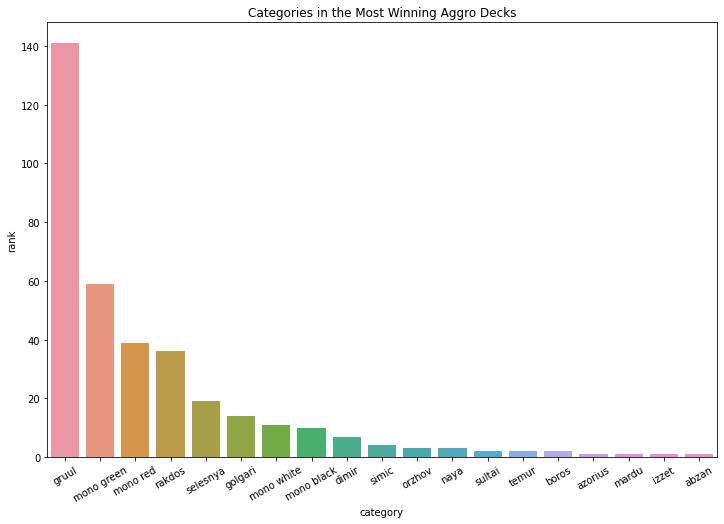

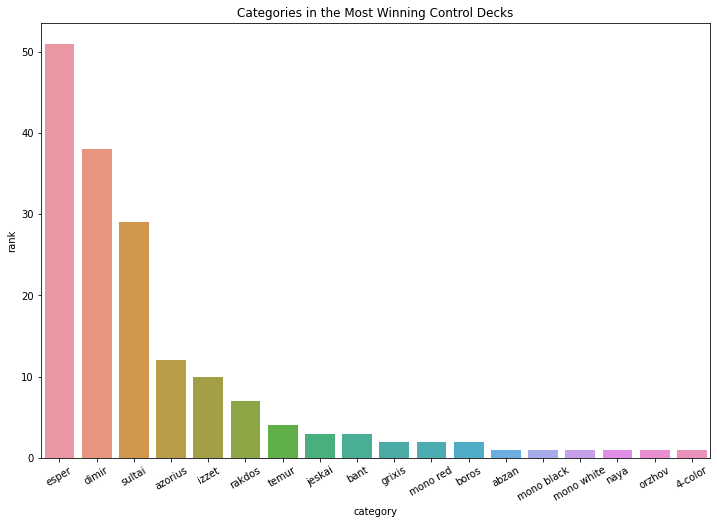

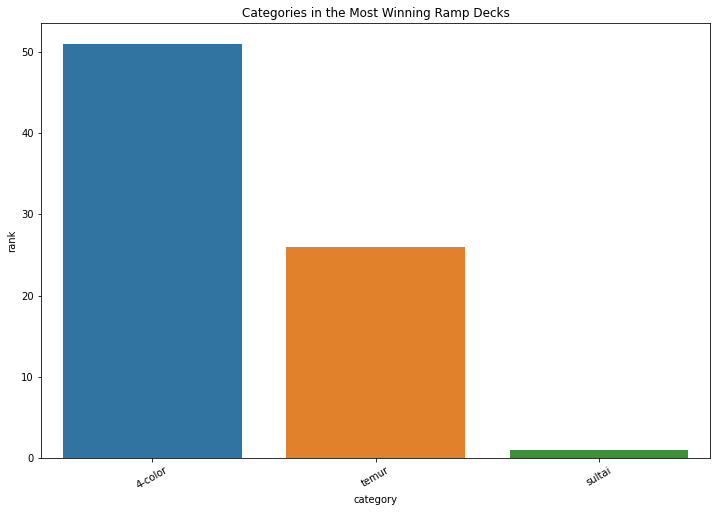

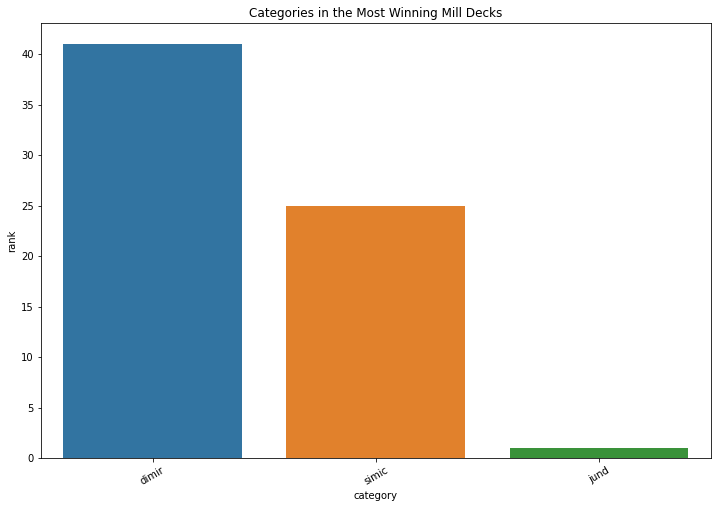

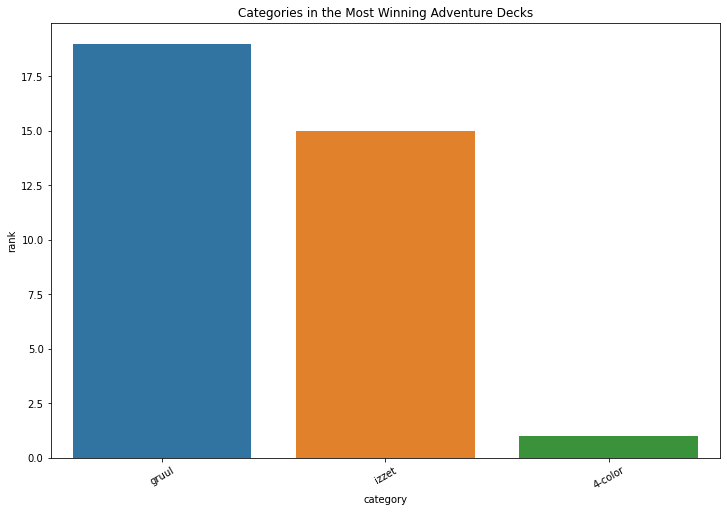

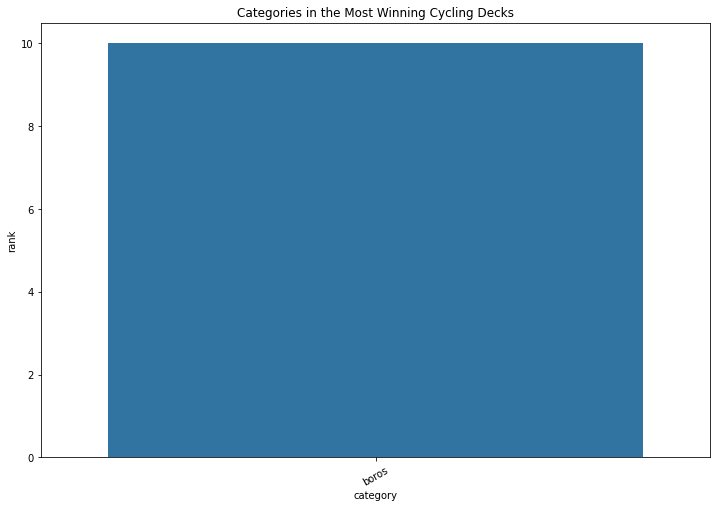

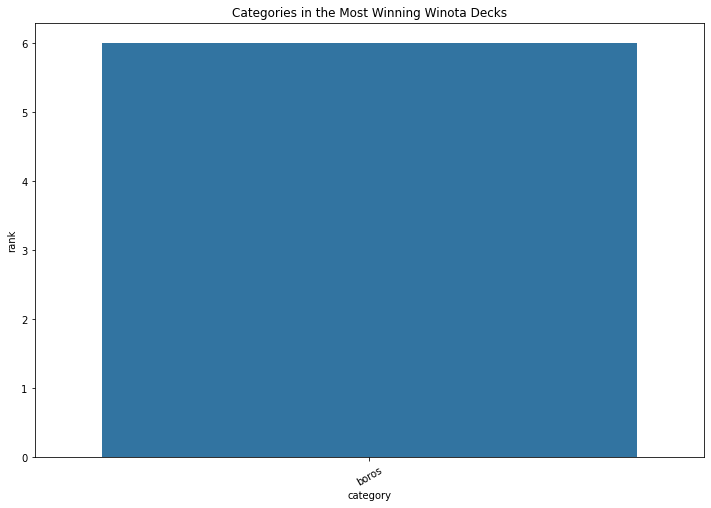

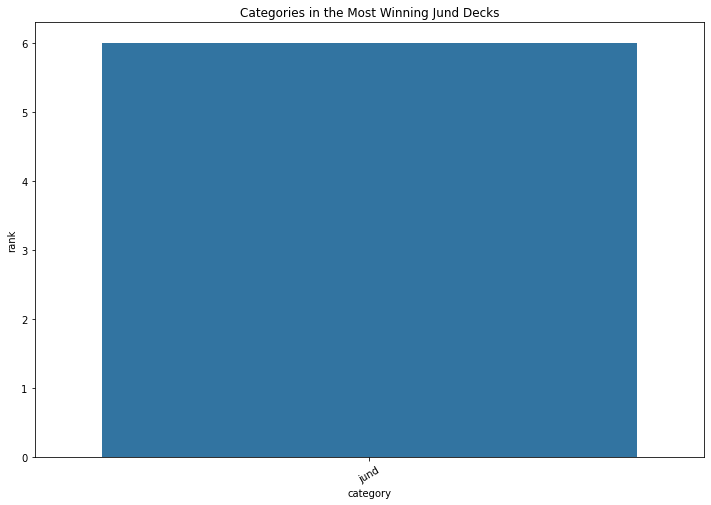

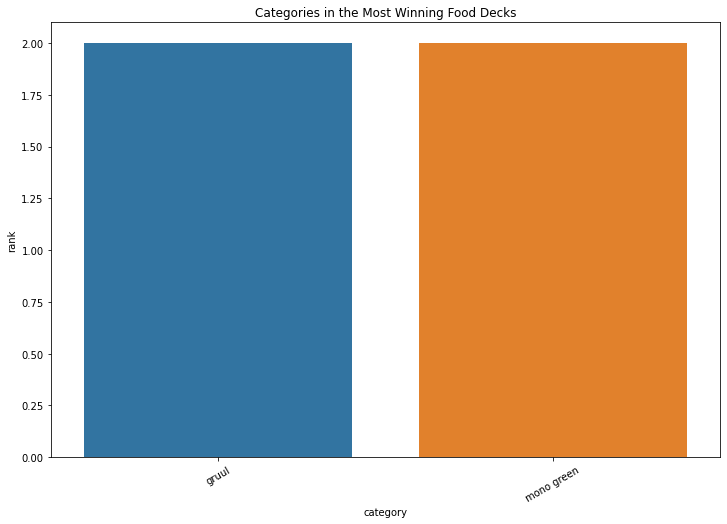

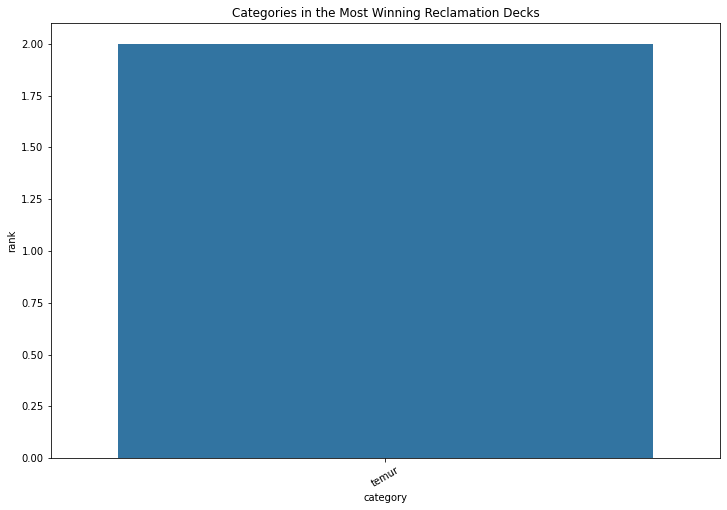

In [118]:
def top10_colors_archetypes():
    top10_archetypes = first_place_decks["archetype"].value_counts().index[:10].tolist()
    for archetype in top10_archetypes:
        colors_and_archetypes(archetype)
#         plt.clf()

top10_colors_archetypes()